# PRACTICA

* Paso a paso:

* Cargue la base de datos “drugs.csv” en Python e investigue cómo convertir las variables predictoras cualitativas de esta base a una escala numérica mediante la instrucción “preprocessing.LabelEncoder()”. Por ejemplo, si una variable tiene 3 posibles categorías, deberá cambiar sus resultados a 0, 1 o 2.
* Use los diversos métodos de optimización para una Regresión Logística vistos en este módulo para encontrar un algoritmo óptimo de clasificación. Explique cuál sería su recomendación para este caso. Regresión Logística 
* ¿Qué tan eficaz es el algoritmo predictivo escogido? Explique a detalle comentando sobre los indicadores obtenidos mediante el reporte de clasificación correspondiente y la curva ROC.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics  import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [108]:
col_names = ['age','sex','bp','cholesterol','na_to_k','drug']
df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M25 DS/drugs.csv', header = None, names= col_names)
df = df.iloc[1:,:]
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
1,23,F,HIGH,HIGH,25.355,drugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX
5,61,F,LOW,HIGH,18.043,drugY


In [109]:
# dividimos las variables para 'X' y 'y'

feature_cols = ['age','sex','bp','cholesterol','na_to_k']
x = df[feature_cols].values
y = df.drug

In [110]:
# convertir variables predictivas cualitativas a numericas

from sklearn import preprocessing

cod_sex = preprocessing.LabelEncoder()
cod_sex.fit(['M','F'])
x[:,1] = cod_sex.transform(x[:,1])

cod_bp = preprocessing.LabelEncoder()
cod_bp.fit(['LOW','NORMAL','HIGH'])
x[:,2] = cod_bp.transform(x[:,2])

cod_chol = preprocessing.LabelEncoder()
cod_chol.fit(['NORMAL','HIGH'])
x[:,3] = cod_chol.transform(x[:,3])

In [114]:
# convertimos variable a predecir en numerica
# farmacos A, B y C ---> origen Nacional, se le asigna el valor 0 
# farmacos X y Y --> origen Extranjero, se le asigna el valor 1

y = y.apply(lambda drug: 0 if drug in['drugA','drugB','drugC'] else 1)
y

1      1
2      0
3      0
4      1
5      1
      ..
196    0
197    0
198    1
199    1
200    1
Name: drug, Length: 200, dtype: int64

In [116]:
# creación de grupos de entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

* RL con solucionador (solver) sag

In [117]:
# inicializamos el modelo
model = LogisticRegression(solver = 'sag')

# entrenamos el modelo

clf = model.fit(x_train, y_train)

# hacemos predicciones

y_pred = model.predict(x_test)

print('Intercepto (Beta0)', clf.intercept_)
print('Pesos de cada variable (Beta1, Beta2,...Beta7)', clf.coef_)
print('--------------------------------------------------------------')

# obtenemos el score

score = model.score(x_test, y_test)
print('Precisión Global', score)
print('--------------------------------------------------------------')

# obtenemos el reporte de clasificación

print(classification_report(y_test, y_pred))

Intercepto (Beta0) [-0.31337108]
Pesos de cada variable (Beta1, Beta2,...Beta7) [[-0.03728113 -0.16156719  1.02860081  0.19379023  0.16044004]]
--------------------------------------------------------------
Precisión Global 0.9
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        30

    accuracy                           0.90        40
   macro avg       0.94      0.80      0.84        40
weighted avg       0.91      0.90      0.89        40



* RL con solucionador (solver) newton-cg

In [118]:
# inicializamos el modelo
model = LogisticRegression(solver = 'newton-cg')

# entrenamos el modelo

clf = model.fit(x_train, y_train)

# hacemos predicciones

y_pred = model.predict(x_test)

print('Intercepto (Beta0)', clf.intercept_)
print('Pesos de cada variable (Beta1, Beta2,...Beta7)', clf.coef_)
print('--------------------------------------------------------------')

# obtenemos el score

score = model.score(x_test, y_test)
print('Precisión Global', score)
print('--------------------------------------------------------------')

# obtenemos el reporte de clasificación

print(classification_report(y_test, y_pred))

Intercepto (Beta0) [-11.15271676]
Pesos de cada variable (Beta1, Beta2,...Beta7) [[0.00660915 0.14831253 3.33613433 2.07248479 0.6378866 ]]
--------------------------------------------------------------
Precisión Global 0.975
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



* RL con solucionador (solver) liblinear

In [119]:
# inicializamos el modelo
model = LogisticRegression(solver = 'liblinear')

# entrenamos el modelo

clf = model.fit(x_train, y_train)

# hacemos predicciones

y_pred = model.predict(x_test)

print('Intercepto (Beta0)', clf.intercept_)
print('Pesos de cada variable (Beta1, Beta2,...Beta7)', clf.coef_)
print('--------------------------------------------------------------')

# obtenemos el score

score = model.score(x_test, y_test)
print('Precisión Global', score)
print('--------------------------------------------------------------')

# obtenemos el reporte de clasificación

print(classification_report(y_test, y_pred))

Intercepto (Beta0) [-3.34051275]
Pesos de cada variable (Beta1, Beta2,...Beta7) [[-0.02834219 -0.26053256  2.06969328  1.09570978  0.27510142]]
--------------------------------------------------------------
Precisión Global 0.975
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



* RL con solucionador (solver) saga

In [120]:
# inicializamos el modelo
model = LogisticRegression(solver = 'saga')

# entrenamos el modelo

clf = model.fit(x_train, y_train)

# hacemos predicciones

y_pred = model.predict(x_test)

print('Intercepto (Beta0)', clf.intercept_)
print('Pesos de cada variable (Beta1, Beta2,...Beta7)', clf.coef_)
print('--------------------------------------------------------------')

# obtenemos el score

score = model.score(x_test, y_test)
print('Precisión Global', score)
print('--------------------------------------------------------------')

# obtenemos el reporte de clasificación

print(classification_report(y_test, y_pred))

Intercepto (Beta0) [-0.14567824]
Pesos de cada variable (Beta1, Beta2,...Beta7) [[-0.03372104 -0.09445994  0.6616053   0.10472575  0.15447383]]
--------------------------------------------------------------
Precisión Global 0.875
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        30

    accuracy                           0.88        40
   macro avg       0.87      0.78      0.81        40
weighted avg       0.87      0.88      0.87        40



* RL con solucionador (solver) lbfgs

In [121]:
# inicializamos el modelo
model = LogisticRegression(solver = 'lbfgs')

# entrenamos el modelo

clf = model.fit(x_train, y_train)

# hacemos predicciones

y_pred = model.predict(x_test)

print('Intercepto (Beta0)', clf.intercept_)
print('Pesos de cada variable (Beta1, Beta2,...Beta7)', clf.coef_)
print('--------------------------------------------------------------')

# obtenemos el score

score = model.score(x_test, y_test)
print('Precisión Global', score)
print('--------------------------------------------------------------')

# obtenemos el reporte de clasificación

print(classification_report(y_test, y_pred))

Intercepto (Beta0) [-11.16791614]
Pesos de cada variable (Beta1, Beta2,...Beta7) [[0.00667297 0.14894912 3.33863745 2.07461152 0.63862512]]
--------------------------------------------------------------
Precisión Global 0.975
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



Los solucionadores que dieron mejores predicciones fueron:

    * newton-cg
    * liblinear
    * lbfgs


# Prediccion de probabilidades para los 8 primeros casos del DF 
* Usamos el modelo newton-cg 

In [122]:
# inicializamos el modelo
model = LogisticRegression(solver = 'newton-cg')

# entrenamos el modelo

clf = model.fit(x_train, y_train)

# hacemos predicciones

y_pred = model.predict(x_test)

print('Intercepto (Beta0)', clf.intercept_)
print('Pesos de cada variable (Beta1, Beta2,...Beta7)', clf.coef_)
print('--------------------------------------------------------------')

# obtenemos el score

score = model.score(x_test, y_test)
print('Precisión Global', score)
print('--------------------------------------------------------------')

# obtenemos el reporte de clasificación

print(classification_report(y_test, y_pred))

Intercepto (Beta0) [-11.15271676]
Pesos de cada variable (Beta1, Beta2,...Beta7) [[0.00660915 0.14831253 3.33613433 2.07248479 0.6378866 ]]
--------------------------------------------------------------
Precisión Global 0.975
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



In [123]:
y_pred_probs = clf.predict_proba(x_test)[:,1]
y_pred_probs[0:5]

array([0.98978684, 0.99974214, 0.99352558, 0.67743552, 0.99999691])

In [124]:
y_test = y_test.to_numpy()
y_test[0:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [126]:
# redondear las probabilidades a cero decimales para que y < 0.5 = 0, y , y > 0.5 = 1

y_pred_probs = np.round(y_pred_probs, 0)
y_pred_probs[0:5]

array([1., 1., 1., 1., 1.])

In [127]:
# graficación de la curva ROC y calculo del area bajo la curva

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

Text(0.5, 1.0, 'Curva ROC para regresión Logisticas')

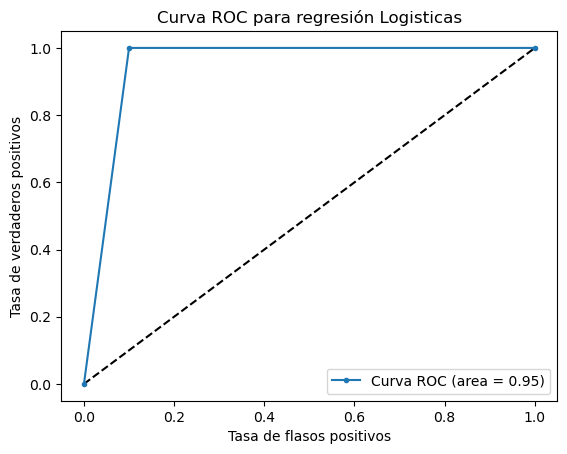

In [129]:
# grafica con escala de 0 a 1 para 'x' y 'y'

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, marker = '.', label = 'Curva ROC (area = %0.2f)' %auc)
plt.xlabel('Tasa de flasos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC para regresión Logisticas')

## El modelo obtuvo buenas predicciones su precisión Global fue de 97% y el area bajo la curva fue de 95% 